In [ ]:
"""
==========================================
Fuzzy Control Systems: The Tipping Problem
==========================================

The 'tipping problem' is commonly used to illustrate the power of fuzzy logic
principles to generate complex behavior from a compact, intuitive set of
expert rules.

If you're new to the world of fuzzy control systems, you might want
to check out the `Fuzzy Control Primer
<../userguide/fuzzy_control_primer.html>`_
before reading through this worked example.

The Tipping Problem
-------------------

Let's create a fuzzy control system which models how you might choose to tip
at a restaurant.  When tipping, you consider the service and food quality,
rated between 0 and 10.  You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

* Antecednets (Inputs)
   - `service`
      * Universe (ie, crisp value range): How good was the service of the wait
        staff, on a scale of 0 to 10?
      * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
   - `food quality`
      * Universe: How tasty was the food, on a scale of 0 to 10?
      * Fuzzy set: bad, decent, great
* Consequents (Outputs)
   - `tip`
      * Universe: How much should we tip, on a scale of 0% to 25%
      * Fuzzy set: low, medium, high
* Rules
   - IF the *service* was good  *or* the *food quality* was good,
     THEN the tip will be high.
   - IF the *service* was average, THEN the tip will be medium.
   - IF the *service* was poor *and* the *food quality* was poor
     THEN the tip will be low.
* Usage
   - If I tell this controller that I rated:
      * the service as 9.8, and
      * the quality as 6.5,
   - it would recommend I leave:
      * a 20.2% tip.


Creating the Tipping Controller Using the skfuzzy control API
-------------------------------------------------------------

We can use the `skfuzzy` control system API to model this. First, let's install scikit-fuzzy package 
"""



In [ ]:
pip install -U scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
temp = ctrl.Antecedent(np.arange(0, 111, 1), 'temp')
cover = ctrl.Antecedent(np.arange(0, 101, 1), 'cover')
speed = ctrl.Consequent(np.arange(0, 101, 1), 'speed')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# service.automf(3)

temp['freezing'] = fuzz.trapmf(temp.universe, [0, 0, 30, 50])
temp['cool'] = fuzz.trimf(temp.universe, [30, 50, 70])
temp['warm'] = fuzz.trimf(temp.universe, [50, 70, 90])
temp['hot'] = fuzz.trapmf(temp.universe, [70, 90, 110, 110])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
cover['sunny'] = fuzz.trapmf(cover.universe, [0, 0, 20, 40])
cover['partly'] = fuzz.trimf(cover.universe, [20, 50, 80])
cover['overcast'] = fuzz.trapmf(cover.universe, [60, 80, 100, 100])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
speed['slow'] = fuzz.trapmf(speed.universe, [0, 0, 25, 75])
speed['fast'] = fuzz.trapmf(speed.universe, [25, 75, 100, 100])


In [ ]:
#To help understand what the membership looks like, use the ``view`` methods.
# quality['decent'].view()
temp.view()

In [ ]:
cover.view()

In [ ]:
speed.view()

In [ ]:
'''Fuzzy rules
-----------

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If Sunny and warm -> fast
2. If cloudy and cool -> slow

Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.

'''

In [ ]:
rule1 = ctrl.Rule(temp['ideal'] & humidity['fine'], egg['safe'])
rule2 = ctrl.Rule(temp['cool'], egg['unsafe'])
rule3 = ctrl.Rule(egg['safe'], incubating['high'])

rule3.view()

In [ ]:
'''Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via:
'''

In [ ]:
speeding_ctrl = ctrl.ControlSystem([rule1, rule2])

In [ ]:
'''In order to simulate this control system, we will create a ControlSystemSimulation. 
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for 
Travis at the cafe because the inputs would be different.'''

In [ ]:
speeding = ctrl.ControlSystemSimulation(speeding_ctrl)

In [ ]:
'''We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.
'''

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
# tipping.input['quality'] = 5.0
# tipping.input['service'] = 8.0

# # Crunch the numbers
# tipping.compute()

speeding.input['temp'] = 65
speeding.input['cover'] = 25

speeding.compute()

In [ ]:
print(speeding.output['speed'])
speed.view(sim=speeding)

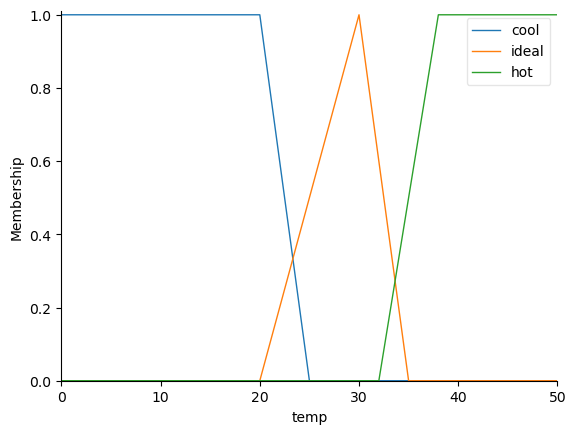

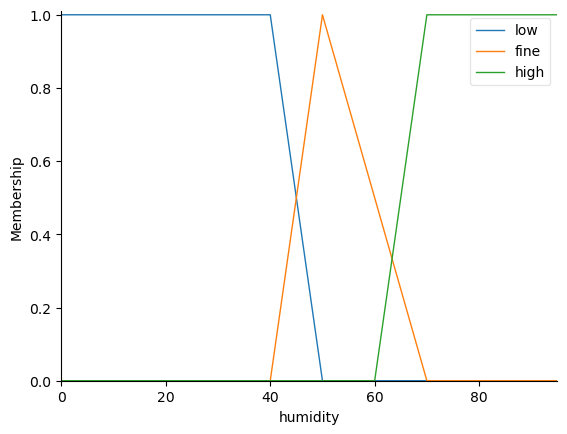

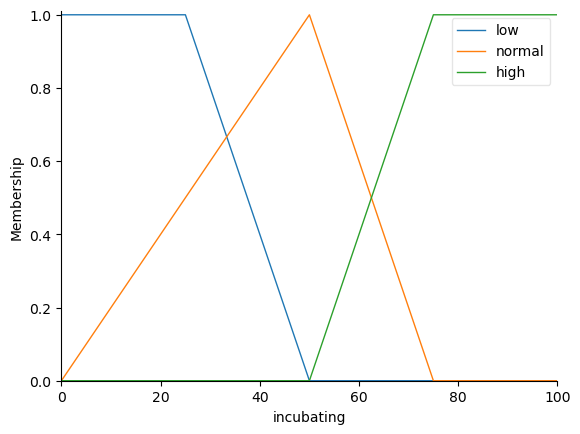

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temp = ctrl.Antecedent(np.arange(0, 51, 1), 'temp') # 20C as origin (0), 50C as 30 
humidity = ctrl.Antecedent(np.arange(0, 96, 1), 'humidity') # 50% as 0, 95% as 45
incubating = ctrl.Consequent(np.arange(0, 101, 1), 'incubating') 

temp['cool'] = fuzz.trapmf(temp.universe, [0, 0, 20, 25])
temp['ideal'] = fuzz.trimf(temp.universe, [20, 30, 35])
temp['hot'] = fuzz.trapmf(temp.universe, [32, 38, 50, 50])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
humidity['low'] = fuzz.trapmf(humidity.universe, [0, 0, 40, 50])
humidity['fine'] = fuzz.trimf(humidity.universe, [40, 50, 70])
humidity['high'] = fuzz.trapmf(humidity.universe, [60, 70, 96, 96])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
incubating['low'] = fuzz.trapmf(incubating.universe, [0, 0, 25, 50])
incubating['normal'] = fuzz.trimf(incubating.universe, [0, 50, 75])
incubating['high'] = fuzz.trapmf(incubating.universe, [50, 75, 100, 100])

temp.view()
humidity.view()
incubating.view()

79.32692307692308


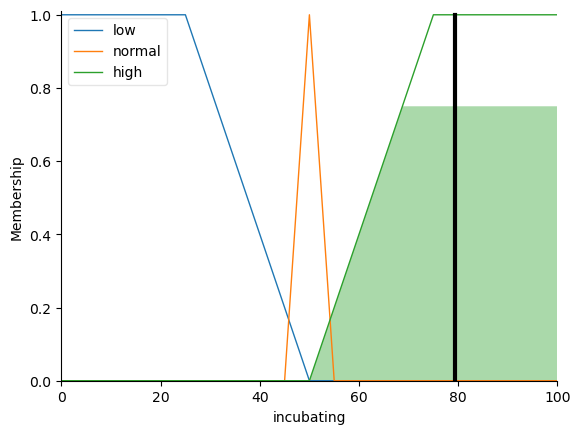

In [6]:
rule1 = ctrl.Rule(temp['ideal'] & humidity['fine'], incubating['high'])

hatching_ctrl = ctrl.ControlSystem([rule1])
hatching_sim = ctrl.ControlSystemSimulation(hatching_ctrl)

hatching_sim.input['temp'] = 30
hatching_sim.input['humidity'] = 55

hatching_sim.compute()
print(hatching_sim.output['incubating'])
incubating.view(sim=hatching_sim)

